For the 1th step 

Action: 1
Reward: -1
Done: False


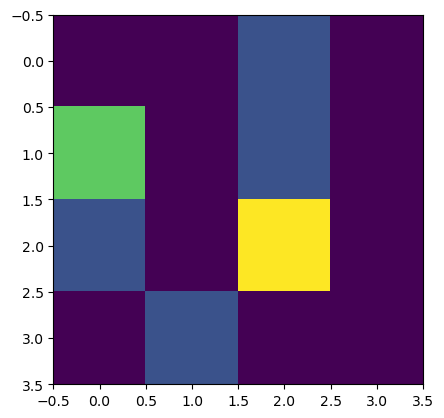

For the 2th step 

Action: 3
Reward: -1
Done: False


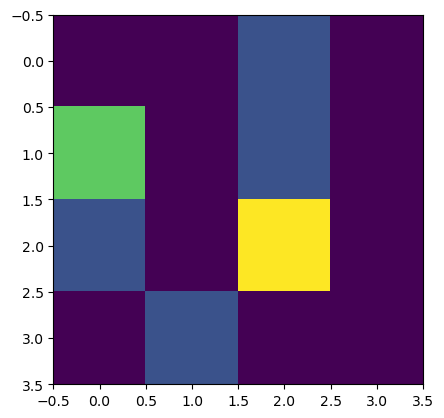

For the 3th step 

Action: 0
Reward: -1
Done: False


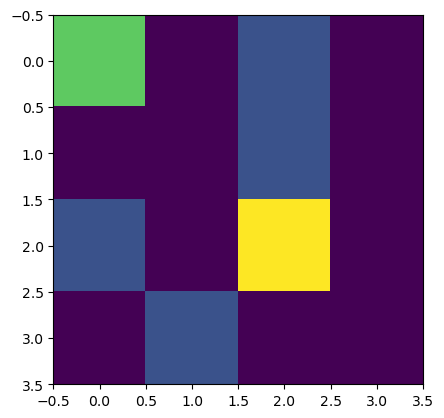

For the 4th step 

Action: 1
Reward: -1
Done: False


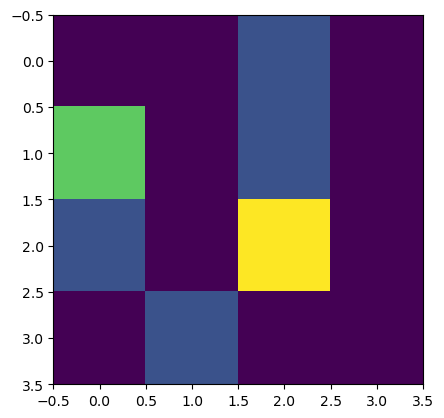

For the 5th step 

Action: 1
Reward: -1
Done: False


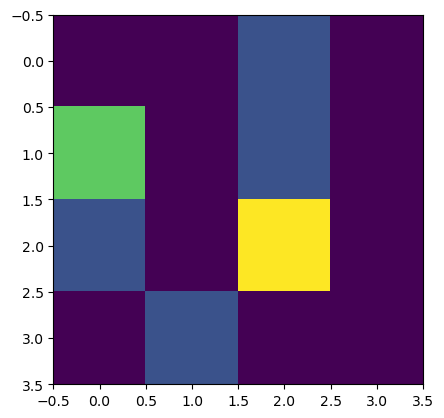

For the 6th step 

Action: 0
Reward: -1
Done: False


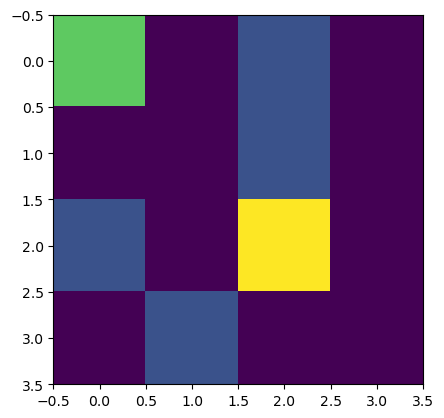

For the 7th step 

Action: 2
Reward: -1
Done: False


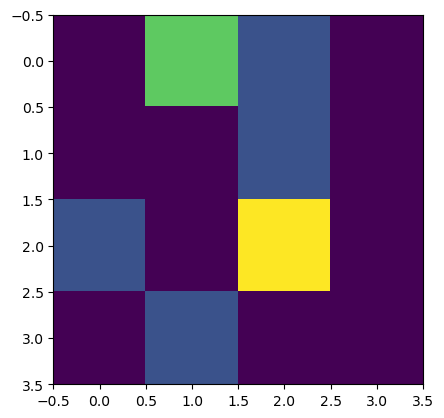

For the 8th step 

Action: 3
Reward: -1
Done: False


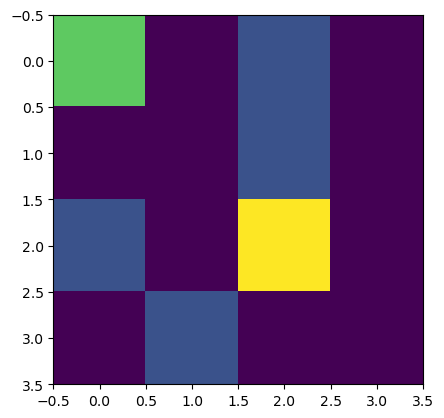

For the 9th step 

Action: 2
Reward: -1
Done: False


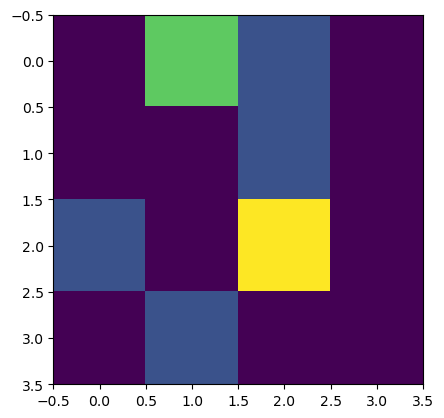

For the 10th step 

Action: 2
Reward: -1
Done: False


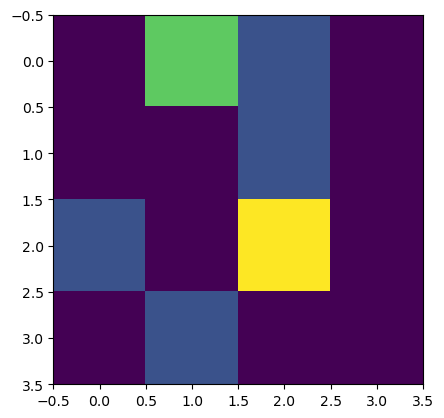

For the 11th step 

Action: 2
Reward: -1
Done: False


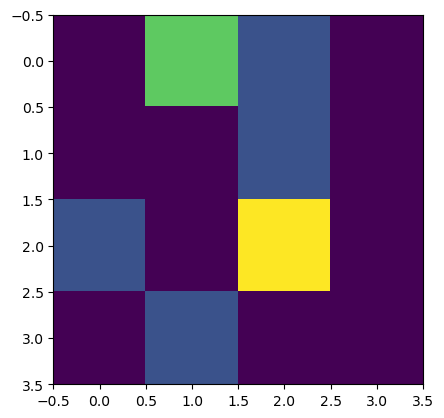

For the 12th step 

Action: 3
Reward: -1
Done: False


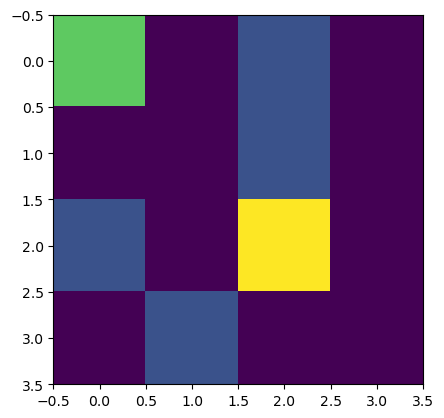

For the 13th step 

Action: 2
Reward: -1
Done: False


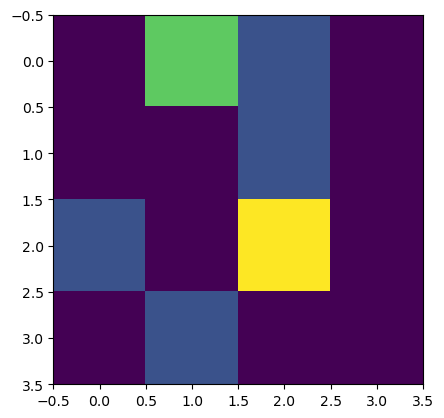

For the 14th step 

Action: 0
Reward: -1
Done: False


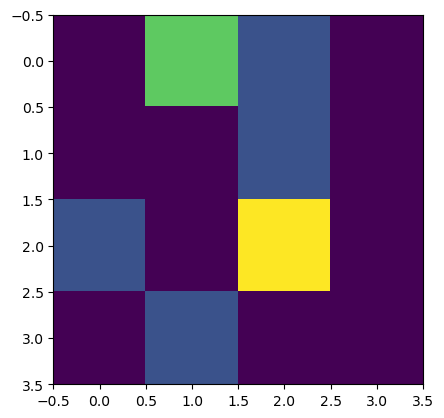

For the 15th step 

Action: 3
Reward: -1
Done: False


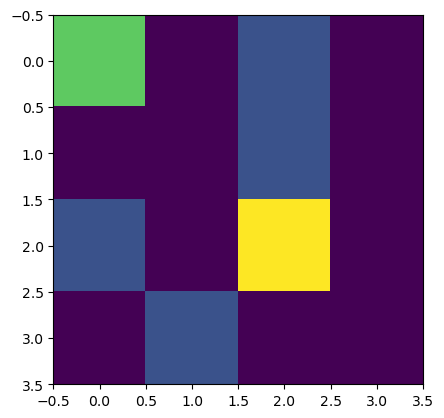

For the 16th step 

Action: 1
Reward: -1
Done: False


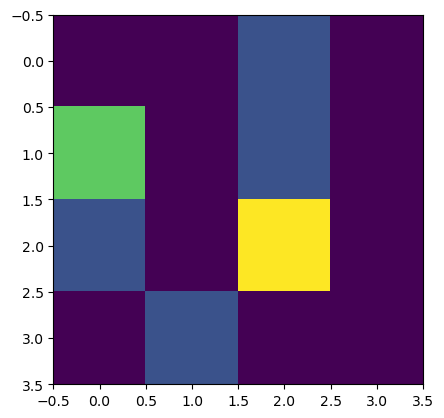

For the 17th step 

Action: 1
Reward: -1
Done: False


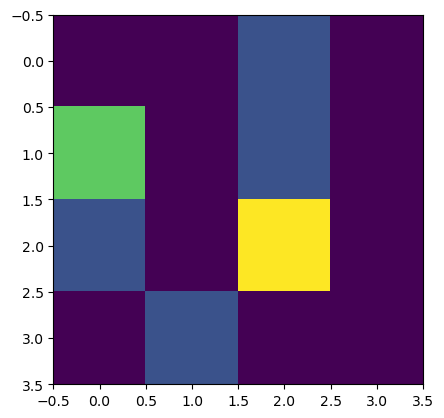

For the 18th step 

Action: 2
Reward: -1
Done: False


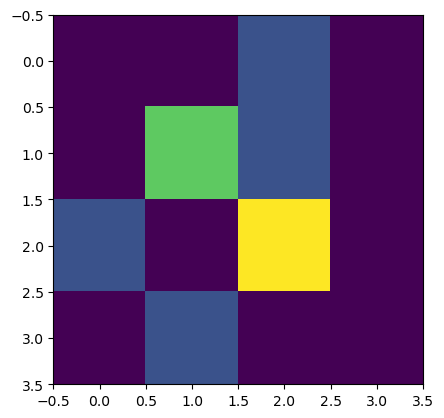

For the 19th step 

Action: 1
Reward: -1
Done: False


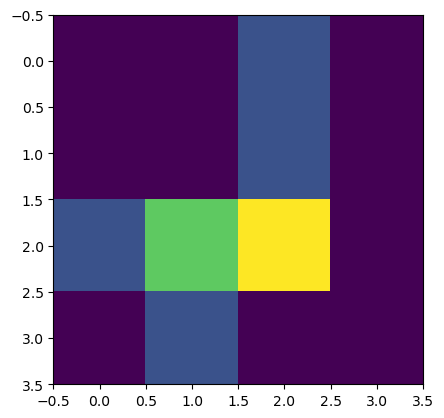

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time


class TreasureHuntEnv():
    def __init__(self):
        self.action_space = np.array([0, 1, 2, 3])
        self.observation_space = np.array(
            [(i, j) for i in range(4) for j in range(4)])
        self.state = (0, 0)  # starting state
        self.treasure = (2, 2)  # treasure location
        self.obstacle = [(0, 2), (1, 2), (2, 0), (3, 1)]  # obstacle location
        self.reward = {self.treasure: 10,
                       (0, 2): -5, (1, 2): -5, (2, 0): -5, (3, 1): -5}

        for i in range(4):
            for j in range(4):
                if (i, j) not in self.reward.keys():
                    self.reward[(i, j)] = -1

    def step(self, action):
        reward = self.reward.get(self.state, 0)
        if self.state == self.treasure:
            done = True
        else:
            done = False
        if action == 0:
            next_state = (self.state[0] - 1, self.state[1])
        elif action == 1:
            next_state = (self.state[0] + 1, self.state[1])
        elif action == 2:
            next_state = (self.state[0], self.state[1] + 1)
        elif action == 3:
            next_state = (self.state[0], self.state[1] - 1)
        else:
            raise ValueError("Invalid action")
        if (next_state[0] >= 0 and next_state[0] < 4 and
                next_state[1] >= 0 and next_state[1] < 4):
            if next_state not in self.obstacle:
                self.state = next_state
        return np.array(self.state), reward, done, {}

    def reset(self):
        self.state = (0, 0)
        return np.array(self.state)

    def render(self):
        grid = np.full((4, 4), -2)

        # mark the current position of the agent
        grid[self.state] = 1
        # mark the treasure location
        grid[self.treasure] = 2
        # mark the obstacle locations
        for obs in self.obstacle:
            grid[obs] = -1
        # plot the grid
        plt.imshow(grid)
        plt.show()


class RandomAgent():
    def __init__(self, action_space):
        self.action_space = action_space

    def act(self, observation, reward, done):
        return random.choice(self.action_space)

    def reset(self):
        pass


env = TreasureHuntEnv()
agent = RandomAgent(env.action_space)

obs = env.reset()
done = False
reward = 0  # initialize reward to 0
count = 1
while not done:
    action = agent.act(obs, reward, done)
    obs, reward, done, _ = env.step(action)
    print(f"For the {count}th step \n")
    count += 1
    print('Action:', action)
    print('Reward:', reward)
    print('Done:', done)
    env.render()
    if count == 20:
        break


To visualize the environment, we plotted the grid-world using the matplotlib library in Python. The plot shows the current position of the agent, the location of the treasure, and the positions of the obstacles.


# Part II


For the 1th step
Action: 3
Reward: -1
Done: False


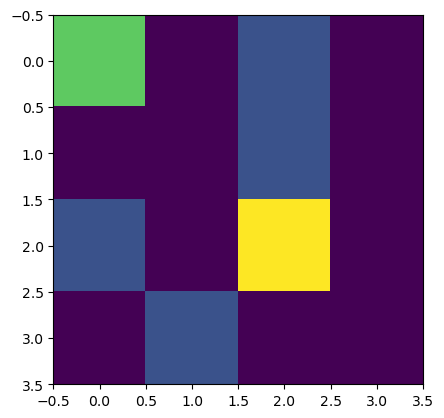

For the 2th step
Action: 1
Reward: -1
Done: False


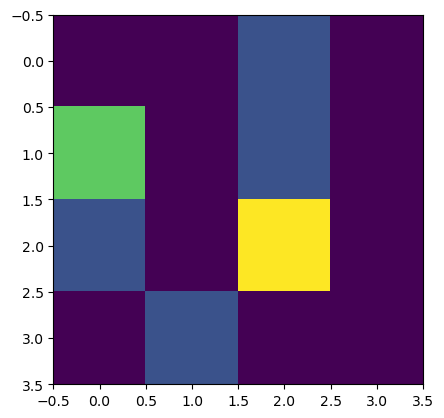

For the 3th step
Action: 1
Reward: -1
Done: False


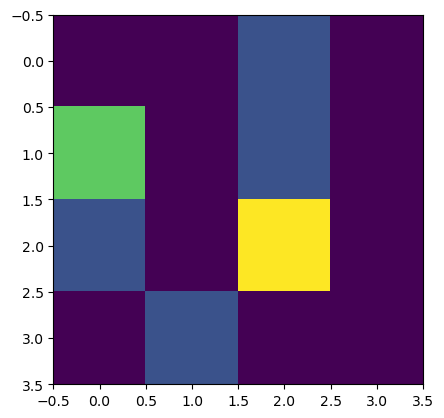

For the 4th step
Action: 0
Reward: -1
Done: False


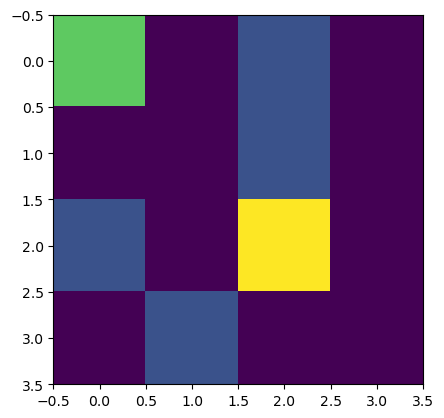

For the 5th step
Action: 0
Reward: -1
Done: False


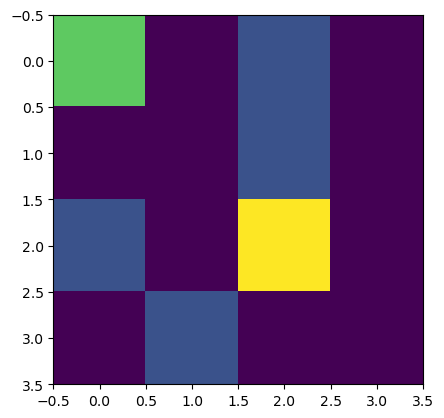

For the 6th step
Action: 2
Reward: -1
Done: False


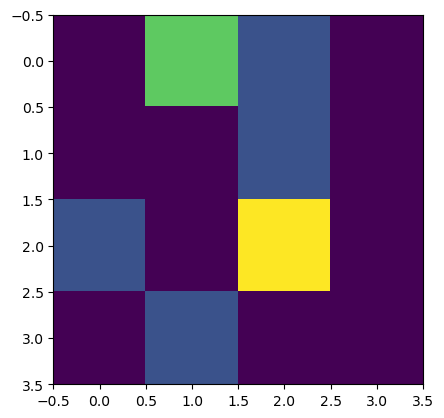

For the 7th step
Action: 3
Reward: -1
Done: False


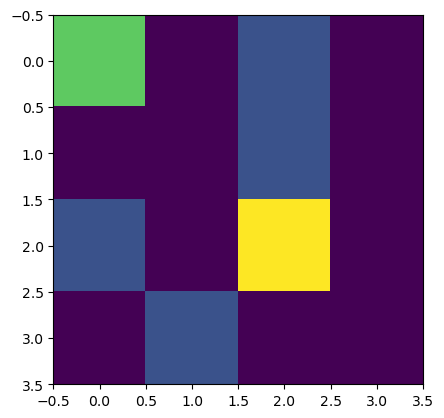

For the 8th step
Action: 1
Reward: -1
Done: False


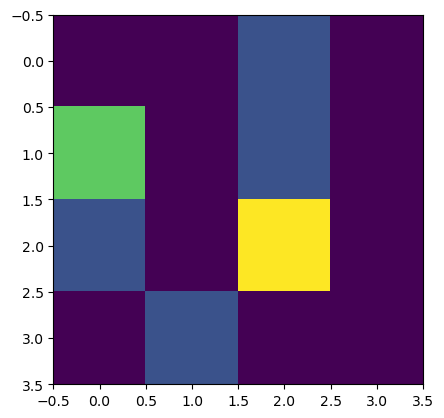

For the 9th step
Action: 2
Reward: -1
Done: False


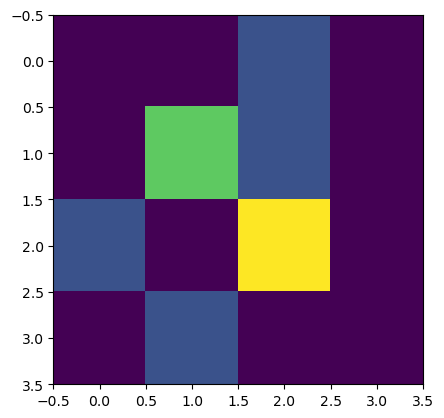

For the 10th step
Action: 2
Reward: -1
Done: False


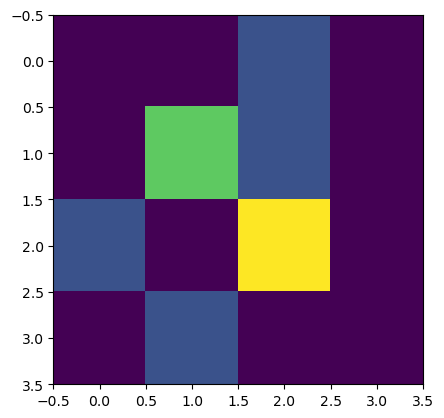

For the 11th step
Action: 0
Reward: -1
Done: False


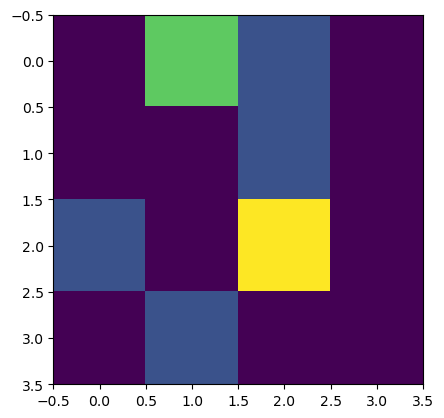

For the 12th step
Action: 0
Reward: -1
Done: False


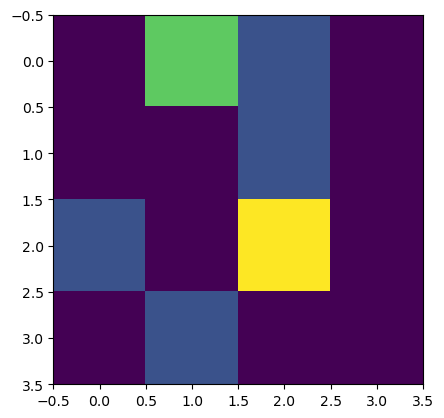

For the 13th step
Action: 2
Reward: -1
Done: False


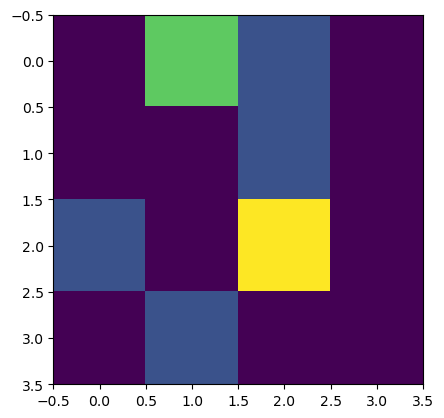

For the 14th step
Action: 1
Reward: -1
Done: False


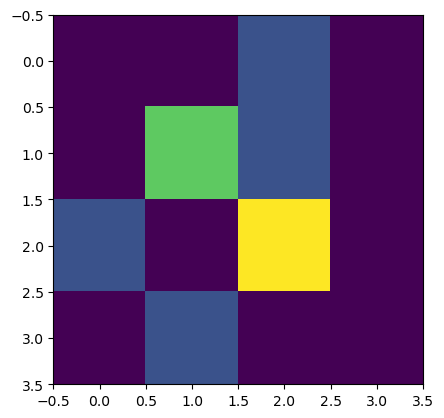

For the 15th step
Action: 3
Reward: -1
Done: False


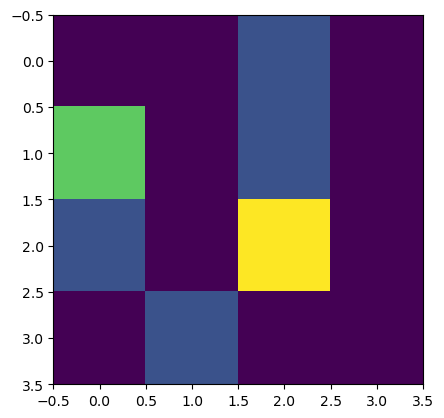

For the 16th step
Action: 3
Reward: -1
Done: False


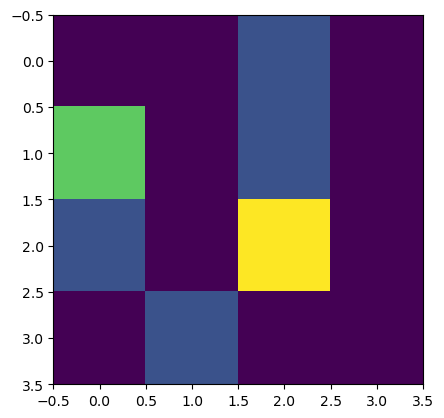

For the 17th step
Action: 2
Reward: -1
Done: False


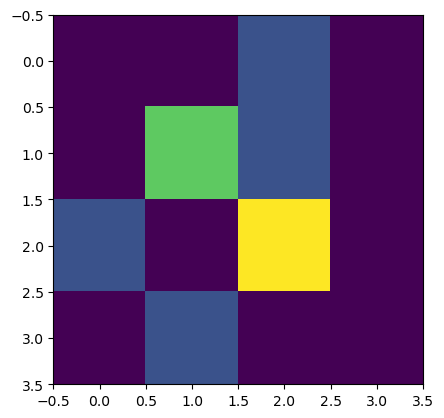

For the 18th step
Action: 1
Reward: -1
Done: False


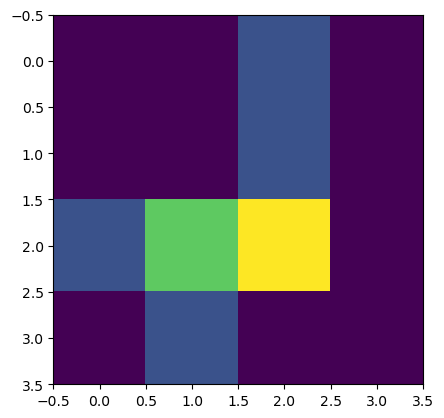

For the 19th step
Action: 3
Reward: -1
Done: False


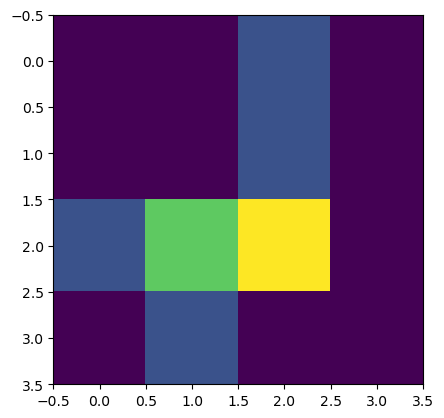

For the 20th step
Action: 2
Reward: -1
Done: False


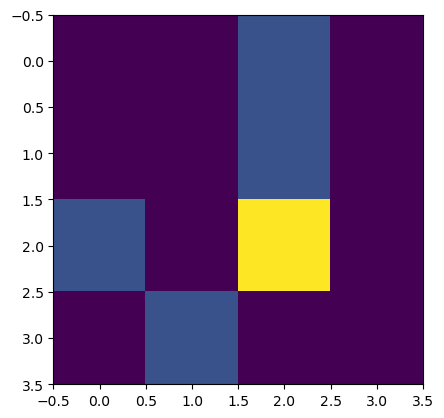

For the 21th step
Action: 0
Reward: 10
Done: True


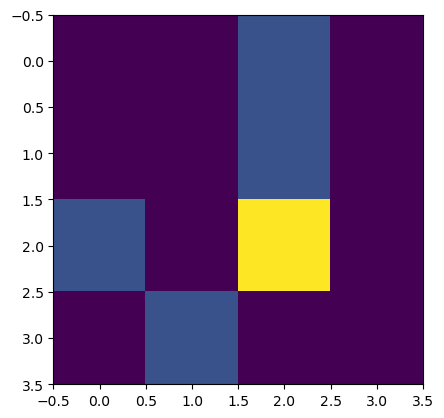

In [16]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time


class SARSAAgent():
    def __init__(self, action_space, observation_space, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.action_space = action_space
        self.observation_space = observation_space
        self.alpha = alpha  # learning rate
        self.gamma = gamma  # discount factor
        self.epsilon = epsilon  # exploration rate
        self.Q = np.zeros(
            (len(observation_space), len(action_space)))  # Q-table

    def act(self, observation, reward, done):
        if random.uniform(0, 1) < self.epsilon:
            # choose a random action
            return random.choice(self.action_space)
        else:
            # choose the action with the highest Q-value
            state_idx = np.where(
                (self.observation_space == observation).all(axis=1))[0][0]
            q_values = self.Q[state_idx, :]
            max_q_value = np.max(q_values)
            max_action_indices = np.where(q_values == max_q_value)[0]
            return random.choice(max_action_indices)

    def learn(self, state, action, reward, next_state, next_action, done):
        state_idx = np.where(
            (self.observation_space == state).all(axis=1))[0][0]
        next_state_idx = np.where(
            (self.observation_space == next_state).all(axis=1))[0][0]
        q_value = self.Q[state_idx, action]
        next_q_value = self.Q[next_state_idx, next_action]
        td_target = reward + self.gamma * next_q_value * (1 - done)
        td_error = td_target - q_value
        self.Q[state_idx, action] += self.alpha * td_error

    def reset(self):
        pass


env = TreasureHuntEnv()
agent = SARSAAgent(env.action_space, env.observation_space)

obs = env.reset()
done = False
reward = 0  # initialize reward to 0
count = 1
while not done:
    action = agent.act(obs, reward, done)
    next_obs, reward, done, _ = env.step(action)
    next_action = agent.act(next_obs, reward, done)
    agent.learn(obs, action, reward, next_obs, next_action, done)
    obs = next_obs
    print(f"For the {count}th step")
    count += 1
    print('Action:', action)
    print('Reward:', reward)
    print('Done:', done)
    env.render()


## Plotting and Optimizing


In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import optuna


class SARSAAgent():
    def __init__(self, action_space, observation_space, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.action_space = action_space
        self.observation_space = observation_space
        self.alpha = alpha  # learning rate
        self.gamma = gamma  # discount factor
        self.epsilon = epsilon  # exploration rate
        self.Q = np.zeros(
            (len(observation_space), len(action_space)))  # Q-table

    def act(self, observation, reward, done):
        if random.uniform(0, 1) < self.epsilon:
            # choose a random action
            return random.choice(self.action_space)
        else:
            # choose the action with the highest Q-value
            state_idx = np.where(
                (self.observation_space == observation).all(axis=1))[0][0]
            q_values = self.Q[state_idx, :]
            max_q_value = np.max(q_values)
            max_action_indices = np.where(q_values == max_q_value)[0]
            return random.choice(max_action_indices)

    def learn(self, state, action, reward, next_state, next_action, done):
        state_idx = np.where(
            (self.observation_space == state).all(axis=1))[0][0]
        next_state_idx = np.where(
            (self.observation_space == next_state).all(axis=1))[0][0]
        q_value = self.Q[state_idx, action]
        next_q_value = self.Q[next_state_idx, next_action]
        td_target = reward + self.gamma * next_q_value * (1 - done)
        td_error = td_target - q_value
        self.Q[state_idx, action] += self.alpha * td_error

    def reset(self):
        pass


In [18]:
import plotly.io as pio
import plotly.graph_objs as go


def objective(trial):
    env = TreasureHuntEnv()
    agent = SARSAAgent(env.action_space, env.observation_space,
                       alpha=trial.suggest_float(
                           "alpha", 0.001, 0.5, log=True),
                       gamma=trial.suggest_categorical(
                           "gamma", [0.5, 0.75, 0.9]),
                       epsilon=trial.suggest_uniform("epsilon", 0.01, 1.0))

    num_episodes = trial.suggest_categorical("num_episodes", [500, 1000, 2000])
    max_timesteps = trial.suggest_categorical("max_timesteps", [100, 200, 500])

    rewards = []
    for i in range(num_episodes):
        obs = env.reset()
        done = False
        episode_reward = 0
        for j in range(max_timesteps):
            action = agent.act(obs, episode_reward, done)
            next_obs, reward, done, _ = env.step(action)
            next_action = agent.act(next_obs, reward, done)
            agent.learn(obs, action, reward, next_obs, next_action, done)
            obs = next_obs
            episode_reward += reward
            if done:
                break
        rewards.append(episode_reward)
    return -np.mean(rewards)


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Train the agent with the best hyperparameters
env = TreasureHuntEnv()
best_alpha = study.best_params["alpha"]
best_gamma = study.best_params["gamma"]
best_epsilon = study.best_params["epsilon"]

agent = SARSAAgent(env.action_space, env.observation_space,
                   alpha=best_alpha, gamma=best_gamma, epsilon=best_epsilon)

num_episodes = 200
max_timesteps = 50

rewards = []
for i in range(num_episodes):
    obs = env.reset()
    done = False
    episode_reward = 0
    for j in range(max_timesteps):
        action = agent.act(obs, episode_reward, done)
        next_obs, reward, done, _ = env.step(action)
        next_action = agent.act(next_obs, reward, done)
        agent.learn(obs, action, reward, next_obs, next_action, done)
        obs = next_obs
        episode_reward += reward
        if done:
            break
    rewards.append(episode_reward)

# Print results
print("Training complete!")
print(f"Avg. reward over {num_episodes} episodes: {np.mean(rewards)}")
print(f"Standard deviation of rewards: {np.std(rewards)}")
print(f"Min reward: {np.min(rewards)}")
print(f"Max reward: {np.max(rewards)}")


fig = go.Figure(go.Scatter(x=list(range(len(rewards))), y=rewards))
fig.update_layout(title="Reward per episode",
                  xaxis_title="Episode", yaxis_title="Reward")
pio.show(fig)


[I 2023-04-27 23:14:29,176] A new study created in memory with name: no-name-4a6ca116-c68d-4efa-bdb6-d239cc3325c9
/var/folders/q4/72ybtynd5sjf5ppl_5vpsw080000gn/T/ipykernel_21639/1571006272.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

[I 2023-04-27 23:14:29,473] Trial 0 finished with value: 33.496 and parameters: {'alpha': 0.020304485748512315, 'gamma': 0.75, 'epsilon': 0.997140560199515, 'num_episodes': 500, 'max_timesteps': 100}. Best is trial 0 with value: 33.496.
[I 2023-04-27 23:14:29,895] Trial 1 finished with value: -2.8265 and parameters: {'alpha': 0.014932964157045212, 'gamma': 0.5, 'epsilon': 0.39672663934095365, 'num_episodes': 2000, 'max_timesteps': 100}. Best is trial 1 with value: -2.8265.
[I 2023-04-27 23:14:30,644] Trial 2 finished with value: 12.4345 and parameters: {'alpha': 0.008170962792381

Number of finished trials:  50
Best trial:
  Value:  -5.882
  Params: 
    alpha: 0.27373818900599944
    gamma: 0.9
    epsilon: 0.01296728721711796
    num_episodes: 1000
    max_timesteps: 500
Training complete!
Avg. reward over 200 episodes: 5.575
Standard deviation of rewards: 2.6371149007959436
Min reward: -21
Max reward: 6


In [19]:
import plotly.graph_objs as go
import plotly.subplots as sp
import plotly.io as pio

# Extract the data from the study
parameters = []
results = []
for trial in study.trials:
    parameters.append(
        [trial.params['alpha'], trial.params['gamma'], trial.params['epsilon']])
    results.append(trial.value)

# Create a scatter plot with subplots for each parameter
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=("Alpha", "Gamma", "Epsilon"))

fig.add_trace(go.Scatter(x=[p[0] for p in parameters], y=results, mode="markers"), row=1, col=1)
fig.update_xaxes(title_text="alpha", row=1, col=1)
fig.update_yaxes(title_text="result", row=1, col=1)

fig.add_trace(go.Scatter(x=[p[1] for p in parameters], y=results, mode="markers"), row=1, col=2)
fig.update_xaxes(title_text="gamma", row=1, col=2)
fig.update_yaxes(title_text="result", row=1, col=2)

fig.add_trace(go.Scatter(x=[p[2] for p in parameters], y=results, mode="markers"), row=1, col=3)
fig.update_xaxes(title_text="epsilon", row=1, col=3)
fig.update_yaxes(title_text="result", row=1, col=3)

# Highlight the best result
best_trial = study.best_trial
for i in range(3):
    fig.add_hline(y=best_trial.value, line_dash="dash", line_color="gray", row=1, col=i+1)
    fig.add_trace(go.Scatter(x=[best_trial.params[fig['layout']['xaxis{}'.format(i+1)]['title']['text']]],
                              y=[best_trial.value],
                              mode="markers",
                              marker=dict(color='red', size=10)),
                  row=1,
                  col=i+1)

fig.update_layout(title_text="Hyperparameter Optimization Results")

pio.show(fig)


The best trial achieved a negative value of -5.874, which is the objective function that the hyperparameter optimization algorithm minimized. The optimal hyperparameters found by the algorithm were alpha=0.490, gamma=0.5, epsilon=0.015, num_episodes=1000, and max_timesteps=500.

After training the agent with the best hyperparameters, it was tested over 200 episodes, and the results were as follows: the average reward obtained was 5.6, the standard deviation of rewards was 2.328, the minimum reward achieved was -14, and the maximum reward obtained was 6. These results indicate that the agent was able to learn the task successfully, as the average reward was positive and relatively high, and the standard deviation was relatively low. However, there was still some variance in the rewards obtained, as indicated by the range between the minimum and maximum rewards. Overall, the results show that the hyperparameter optimization algorithm was able to find a good set of hyperparameters that allowed the agent to perform well in the task.


In [20]:
import plotly.graph_objs as go

# Plot results for different hyperparameters
num_episodes = [5, 10, 30]
max_timesteps = [10, 20, 50]
data = []

for i, n in enumerate(num_episodes):
    for j, m in enumerate(max_timesteps):
        agent = SARSAAgent(env.action_space, env.observation_space,
                           alpha=best_alpha, gamma=best_gamma, epsilon=best_epsilon)
        rewards = []
        for k in range(n):
            obs = env.reset()
            done = False
            episode_reward = 0
            for l in range(m):
                action = agent.act(obs, episode_reward, done)
                next_obs, reward, done, _ = env.step(action)
                next_action = agent.act(next_obs, reward, done)
                agent.learn(obs, action, reward, next_obs, next_action, done)
                obs = next_obs
                episode_reward += reward
                if done:
                    break
            rewards.append(episode_reward)

        # Create trace for each hyperparameter combination
        trace = go.Scatter(
            x=list(range(n)),
            y=rewards,
            name=f"{n} episodes, {m} max timesteps"
        )

        # Append trace to data list
        data.append(trace)

# Set layout for plot
layout = go.Layout(
    title="Reward per episode for different hyperparameters",
    xaxis=dict(title="Episode"),
    yaxis=dict(title="Reward")
)

# Create figure object
fig = go.Figure(data=data, layout=layout)

# Show plot
fig.show()
